In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [17]:
df = pd.read_csv('data.csv')

#dropping columns not necessary for data analysis
df.drop(['Timestamp', 'comments', 'state', 'Country', 'phys_health_interview', 'phys_health_consequence'],
        axis=1, inplace=True)

#dropping null values
df.work_interfere.dropna(inplace=True)
df.self_employed.dropna(inplace=True)
df['Age'] = df['Age'].astype(int)

df['Gender'] = df['Gender'].replace({'f':'F'})
df['Gender'] = df['Gender'].replace({'female':'F'})
df['Gender'] = df['Gender'].replace({'Male':'M'})
df['Gender'] = df['Gender'].replace({'male':'M'})
df['Gender'] = df['Gender'].replace({'Female':'F'})
df['Gender'] = df['Gender'].replace({'m':'M'})
df['Gender'] = df['Gender'].replace({'Make':'M'})
df['Gender'] = df['Gender'].replace({'Woman':'F'})
df['Gender'] = df['Gender'].replace({'Man':'M'})
df['Gender'] = df['Gender'].replace({'Femake':'F'})
df['Gender'] = df['Gender'].replace({'Malr':'M'})
df['Gender'] = df['Gender'].replace({'Mail':'M'})
df['Gender'] = df['Gender'].replace({'femail':'F'})
df['Gender'] = df['Gender'].replace({'Female ':'F'})
df['Gender'] = df['Gender'].replace({'Female (trans)':'trans'})
df['Gender'] = df['Gender'].replace({'Trans-female':'trans'})
df['Gender'] = df['Gender'].replace({'Trans woman':'trans'})
df['Gender'] = df['Gender'].replace({'Cis Male':'M'})
df['Gender'] = df['Gender'].replace({'Cis Male':'M'})
df['Gender'] = df['Gender'].replace({'cis-female/femme':'F'})
df['Gender'] = df['Gender'].replace({'cis male':'M'})
df['Gender'] = df['Gender'].replace({'Cis Man':'M'})
df['Gender'] = df['Gender'].replace({'maile':'M'}) 
df['Gender'] = df['Gender'].replace({'Mal':'M'})
df['Gender'] = df['Gender'].replace({'Cis Female':'F'})
df['Gender'] = df['Gender'].replace({'woman':'F'})
df['Gender'] = df['Gender'].replace({'Female (cis)':'F'})
df['Gender'] = df['Gender'].replace({'Male ':'M'})
df['Gender'] = df['Gender'].replace({'Male (CIS)':'M'})
df['Gender'] = df['Gender'].replace({'msle':'M'})
df['Gender'] = df['Gender'].replace({'queer/she/they':'queer'})
df['Gender'] = df['Gender'].replace({'queer':'queer'})
df['Gender'] = df['Gender'].replace({'Genderqueer':'queer'})
df['Gender'] = df['Gender'].replace({'fluid':'queer'})
df['Gender'] = df['Gender'].replace({'non-binary':'queer'})
df['Gender'] = df['Gender'].replace({'Androgyne':'queer'})
df['Gender'] = df['Gender'].replace({'male leaning androgynous':'queer'})
df['Gender'] = df['Gender'].replace({'Agender':'queer'})
df['Gender'] = df['Gender'].replace({'something kinda male?':'other'})
df['Gender'] = df['Gender'].replace({'Nah':'other'})
df['Gender'] = df['Gender'].replace({'Agender':'other'})
df['Gender'] = df['Gender'].replace({'Neuter':'other'})
df['Gender'] = df['Gender'].replace({'p':'other'})
df['Gender'] = df['Gender'].replace({'Guy (-ish) ^_^':'other'})
df['Gender'] = df['Gender'].replace({'Male-ish':'other'})
df['Gender'] = df['Gender'].replace({'A little about you':'other'})
df['Gender'] = df['Gender'].replace({'Enby':'other'})
df['Gender'] = df['Gender'].replace({'All':'other'})
df['Gender'] = df['Gender'].replace({'ostensibly male, unsure what that really means':'other'})

#consoldating two employee sizes

df['no_employees'] = df['no_employees'].replace({'1-5':'1-25'})
df['no_employees'] = df['no_employees'].replace({'6-25':'1-25'})

df.self_employed.dropna(axis=0, inplace=True)
df.self_employed.isna().sum()

df.dropna(inplace=True)

for age in df.Age.values:
    if age <= 17 or age >= 80:
        df.Age.replace(age, 1, inplace=True)
        
df['Age'] = df['Age'].replace({1:df.Age.mean()})
df.Age = df.Age.round(2)

df.head(2)

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
18,46.0,M,Yes,Yes,No,Sometimes,1-25,Yes,Yes,Yes,...,Yes,Don't know,Yes,Very easy,No,Yes,Yes,No,Yes,Yes
20,29.0,M,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,No,No,No,Somewhat difficult,Maybe,Some of them,Some of them,No,No,No


In [18]:
#Target and independent variables

X = df.drop('work_interfere', axis=1)
y = df['work_interfere']

#Target and independent variables

X = df.drop('work_interfere', axis=1)
y = df['work_interfere']

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000, test_size=0.2)


cont = X_train.select_dtypes(exclude='object')

cat = X_train.select_dtypes(include='object')


# one hot encoding


In [19]:
ohe = OneHotEncoder(drop='first')
train = ohe.fit_transform(cat).toarray()
train_df= pd.DataFrame(train, columns=ohe.get_feature_names(cat.columns))
train_df.head(2)

,Gender_M,Gender_other,Gender_queer,Gender_trans,self_employed_Yes,family_history_Yes,treatment_Yes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,...,mental_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
train_df.reset_index(inplace=True, drop=True)
cont.reset_index(inplace=True, drop=True)
X_train = train_df.join(cont)


# SMOTE

SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [21]:

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=28)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [22]:
y_train.value_counts()

Never        361
Rarely       361
Sometimes    361
Often        361
Name: work_interfere, dtype: int64

In [23]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

smote_model= forest.fit(X_train, y_train)

In [24]:
smote_model.score(X_train, y_train)

0.731994459833795

In [25]:
features = smote_model.feature_importances_
smote_df = pd.DataFrame(X_strain.columns)
smote_df['features'] = forest.feature_importances_
smote_df.head(2)

,0,features
0,Gender_M,0.029970
1,Gender_other,0.000442


In [28]:
X_train.shape

(1444, 39)

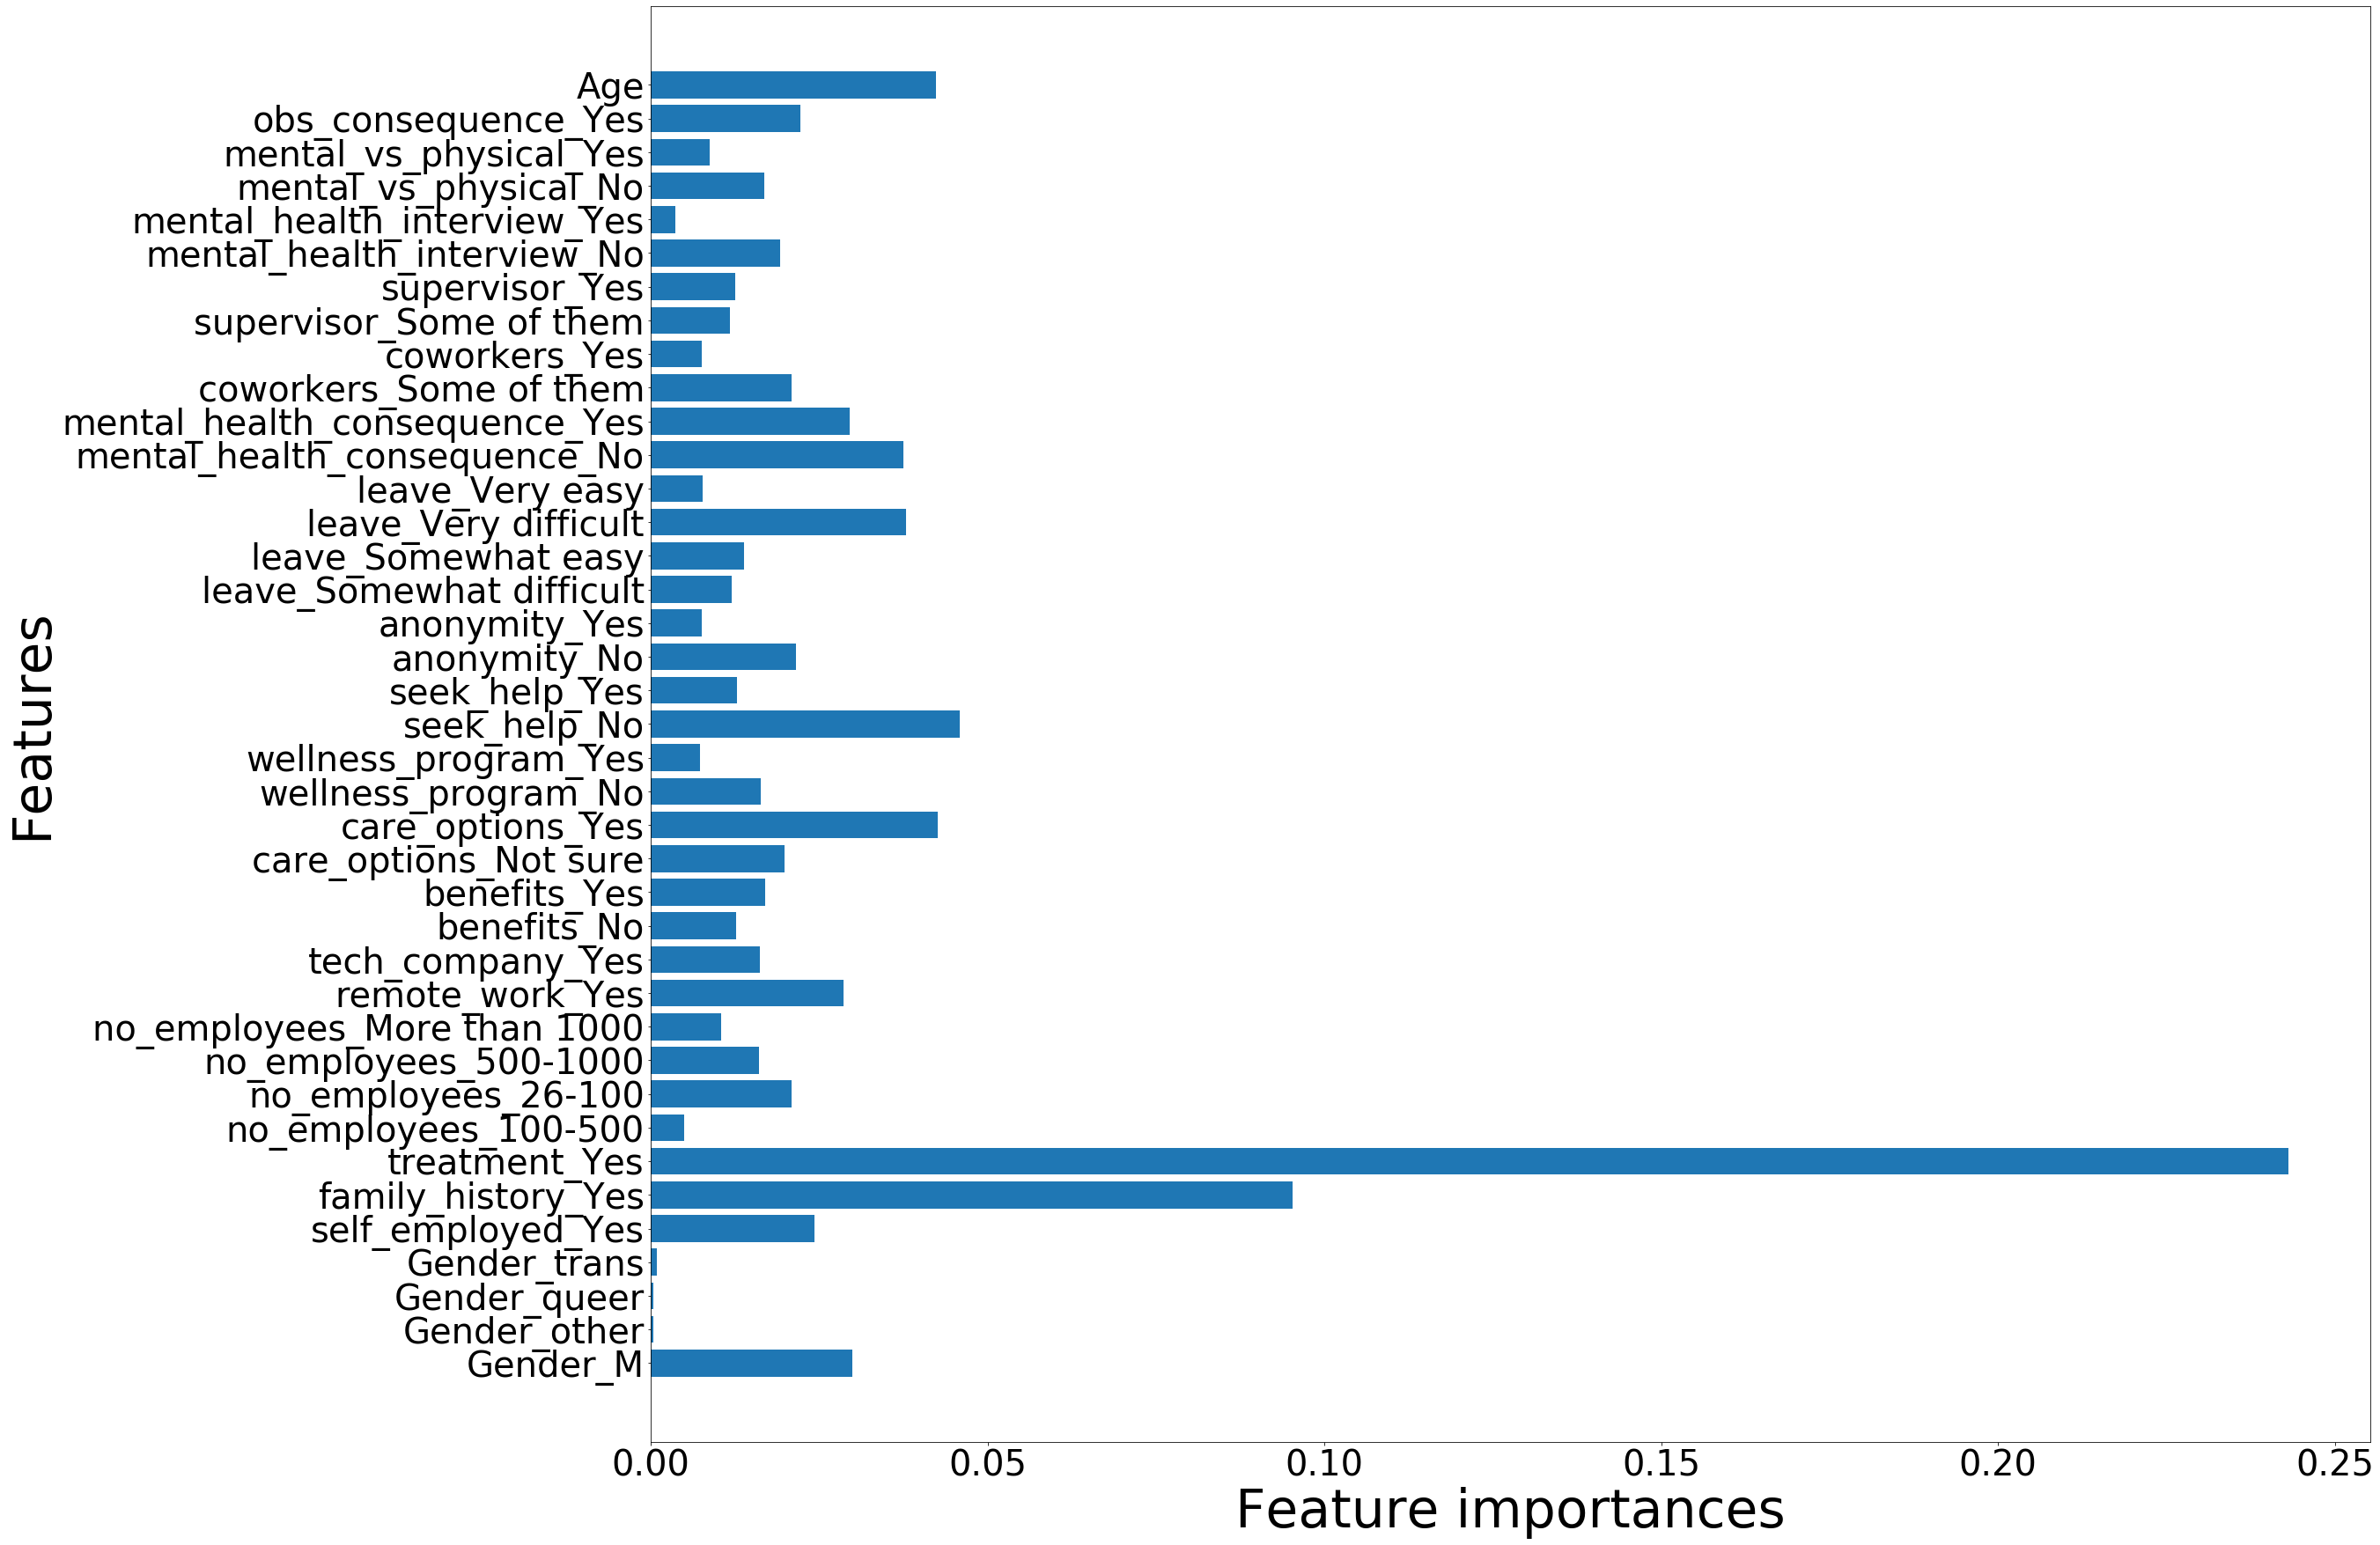

In [34]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(35,30))
    plt.barh(range(n_features), features, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importances', fontsize=60)
    plt.ylabel('Features', fontsize=60) 
    plt.yticks(fontsize=40)
    plt.xticks(fontsize=40)

plot_feature_importances(smote_model)

# Random Forest

In [85]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)

forest_model = forest.fit(X_train, y_train)

In [86]:
forest_model.score(X_train, y_train)

0.7209141274238227

In [87]:
features = pd.DataFrame(X_train.columns.values)
features['feature_importances'] = forest_model.feature_importances_


features.columns = ['features','feature_importances']

features.head(2)

,features,feature_importances
0,Gender_M,0.036967
1,Gender_other,0.000055


In [88]:
features= features.sort_values(by=['feature_importances'], ascending=False)
features.reset_index(drop='first', inplace= True)

In [89]:
features

,features,feature_importances
0,treatment_Yes,0.272170
1,family_history_Yes,0.076622
2,seek_help_No,0.049900
3,leave_Very difficult,0.039425
4,mental_health_consequence_No,0.038518
5,Age,0.037350
6,Gender_M,0.036967
7,remote_work_Yes,0.033670
8,care_options_Yes,0.033618
9,self_employed_Yes,0.025550


Text(0.5, 0, 'feature importances')

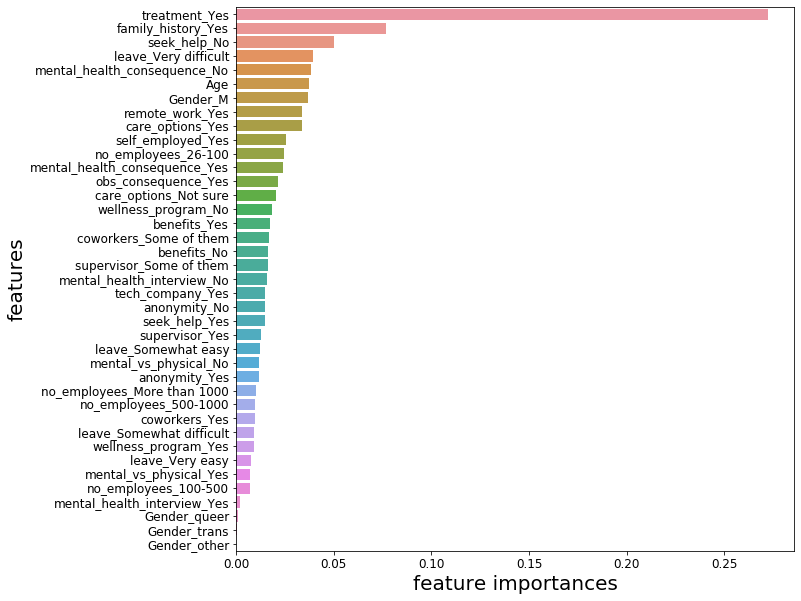

In [92]:

y = features.feature_importances
x = features.features
plt.figure(figsize=(10, 10))
sns.barplot(y, x)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('features', fontsize=20)
plt.xlabel('feature importances', fontsize=20)
